In [1]:
import yt
import matplotlib.pyplot  as plt
import numpy as np

In [2]:
def get_yt_data_2d(filename):

    k_idx = 0
    fields_list = ["dens", "tele", "tion",
                #    "depo",
                   # "pres", "temp", "cham", "targ", 
                #    "velx", 
                   "ye"]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=[-0.04, 0.0, -0.004], dims=data_yt.domain_dimensions
    ) # note here about the left_edge in x,y,z.
    time_now = np.array(data_yt.current_time)*1e9

    data_dict = {}
    for f in fields_list:
        # data_dict[f] = data_yt_map[f][k_idx,:] # careful here about which axis is which
        data_dict[f] = data_yt_map[f][:,:,k_idx] # careful here about which axis is which
    return data_dict, time_now

In [3]:
filedir = [
            '/Users/yao/Desktop/Data/Opacity/job.75734/', # v4.8 
          ] 

filename = 'radslab_hdf5_chk_0001'  # check the mass fraction for the negative energy

In [4]:
data_yt = yt.load(filedir[0]+filename)
data_yt_map = data_yt.covering_grid(level=0, left_edge=[0, 0.0, 0.0], dims=data_yt.domain_dimensions)
time_now = np.array(data_yt.current_time)*1e9

yt : [INFO     ] 2024-07-05 14:01:14,355 Particle file found: radslab_hdf5_chk_0001
yt : [INFO     ] 2024-07-05 14:01:14,386 Parameters: current_time              = 2.0075291644898736e-10
yt : [INFO     ] 2024-07-05 14:01:14,386 Parameters: domain_dimensions         = [64 64  1]
yt : [INFO     ] 2024-07-05 14:01:14,387 Parameters: domain_left_edge          = [-0.04   0.    -0.004]
yt : [INFO     ] 2024-07-05 14:01:14,387 Parameters: domain_right_edge         = [0.04  0.08  0.004]
yt : [INFO     ] 2024-07-05 14:01:14,387 Parameters: cosmological_simulation   = 0


In [5]:
data_yt.field_list

[('flash', 'absr'),
 ('flash', 'cham'),
 ('flash', 'cond'),
 ('flash', 'dbgs'),
 ('flash', 'dens'),
 ('flash', 'dfcf'),
 ('flash', 'eele'),
 ('flash', 'eint'),
 ('flash', 'eion'),
 ('flash', 'emis'),
 ('flash', 'ener'),
 ('flash', 'erad'),
 ('flash', 'fllm'),
 ('flash', 'gamc'),
 ('flash', 'game'),
 ('flash', 'mgdc'),
 ('flash', 'pele'),
 ('flash', 'pion'),
 ('flash', 'pipe'),
 ('flash', 'prad'),
 ('flash', 'pres'),
 ('flash', 'r001'),
 ('flash', 'r002'),
 ('flash', 'r003'),
 ('flash', 'r004'),
 ('flash', 'r005'),
 ('flash', 'r006'),
 ('flash', 'shok'),
 ('flash', 'sumy'),
 ('flash', 'targ'),
 ('flash', 'tele'),
 ('flash', 'temp'),
 ('flash', 'tion'),
 ('flash', 'tite'),
 ('flash', 'trad'),
 ('flash', 'velx'),
 ('flash', 'vely'),
 ('flash', 'velz'),
 ('flash', 'volx'),
 ('flash', 'voly'),
 ('flash', 'volz'),
 ('flash', 'ye')]

In [17]:
data_dict, time_now = get_yt_data_2d(filedir[0]+filename)
print(data_dict.keys())

yt : [INFO     ] 2024-07-05 14:15:15,346 Particle file found: radslab_hdf5_chk_0001
yt : [INFO     ] 2024-07-05 14:15:15,374 Parameters: current_time              = 2.0075291644898736e-10
yt : [INFO     ] 2024-07-05 14:15:15,374 Parameters: domain_dimensions         = [64 64  1]
yt : [INFO     ] 2024-07-05 14:15:15,374 Parameters: domain_left_edge          = [-0.04   0.    -0.004]
yt : [INFO     ] 2024-07-05 14:15:15,375 Parameters: domain_right_edge         = [0.04  0.08  0.004]
yt : [INFO     ] 2024-07-05 14:15:15,375 Parameters: cosmological_simulation   = 0


dict_keys(['dens', 'tele', 'tion', 'ye'])


(64, 64)


/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_38989/1344430252.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


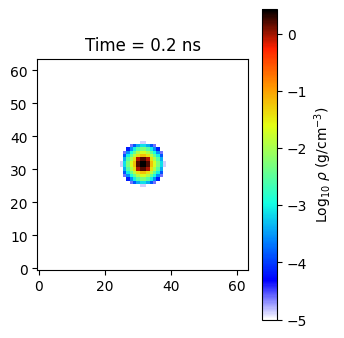

In [21]:
import matplotlib as mpl

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

width  = 3.487 * 1.0
height = width #/ 1.618 * 0.8

# fig = plt.figure(figsize=(width, height))

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
print(data_dict['dens'].shape)
f1 = ax.imshow(np.log10(data_dict['dens'].T),
           # cmap='magma_r',
               cmap=newcmap,
           origin='lower',
        #    extent=[0,1,0,2],
        #    vmin=-6,
        #    vmax=-2,
           aspect='equal',
          )

# ax.set_xlim(0,1)
# ax.set_ylim(0,2)
# ax.set_xlabel('r (cm)')
# ax.set_ylabel('z (cm)')
ax.set_title('Time = {:.1f} ns'.format(time_now))

cbar = fig.colorbar(f1)
cbar.ax.set_ylabel(r'Log$_{10}$ $\rho$ (g/cm$^{-3}$)')
# cbar.minorticks_on()
cbar.cmap.set_under('white')
cbar.cmap.set_over('black')
# cbar

# Colorbar
# grid[1].cax.colorbar(im1)
# grid[1].cax.cla()
# mpl.colorbar.Colorbar(grid[1].cax,im1)
# grid[1].cax.toggle_label(True)
# grid[1].cax.tick_params(size=0)
# grid[1].cax.toggle_label(True)
# fig.tight_layout()

fig.set_size_inches(width, height)
fig.tight_layout()
plt.show()

In [9]:
data_dict['dens']

TypeError: tuple indices must be integers or slices, not str